In [2]:
%pylab --no-import-all inline
import seaborn as sns
from sklearn.datasets import make_blobs

Populating the interactive namespace from numpy and matplotlib


#  Cost Function in Logistic Regression
Given a training set of $m$ examples

$$
{(x^{1}, y^{1}),(x^{2}, y^{2}), \dots, (x^{m}, y^{m})}
$$

where $x$ is a vector $\mathbb{R}^{n+1}$ with $x_0=1$ and $y$ assumes discrete values $0,1$

$$
x \in
\begin{bmatrix}
x_0\\
x_1\\
\dots\\
x_n
\end{bmatrix}
$$

$$y \in \{0,1\}$$

and the hypothesis $h_\theta(x)$ is logistic

$$h_\theta(x)=\frac{1}{1+e^{-\theta^Tx}}$$

How do we chose (or how do we fit) the parameters $\theta$? For Linear regression we use the Cost function $J(\theta)$

$$J(\theta)=\frac{1}{m}\sum^m_{i=1}\frac{1}{2}\left(h_\theta\left(x^{(i)}\right)-y^{(i)}\right)^2$$

But this function used is logistic regression is **non-convex**, it has many local minima and using gradient descent would lead to poor optimization (minimzation) and is not guaranteed to converge to the global minimum.

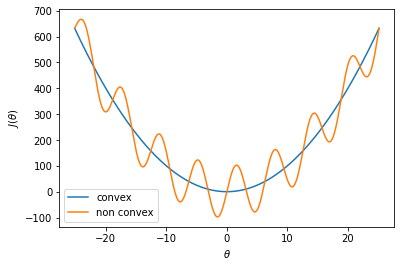

In [26]:
cycles = 8
p = np.linspace(-np.pi*cycles, np.pi*cycles, 1000)
fig, ax = plt.subplots()
ax.plot(p, p**2, label='convex')
ax.plot(p, np.sin(p)*100+p**2, label='non convex')
ax.set_xlabel('$\\theta$')
ax.set_ylabel('$J(\\theta)$')
ax.legend();